Credit Default
https://www.kaggle.com/c/gb-credit-default/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
%matplotlib inline

In [2]:
# paths
RAW_DATA_PATH = Path('./data_raw')
RAW_TRAIN_PATH = RAW_DATA_PATH / 'train.csv'

### 0. Количественные и качественные признаки.

In [3]:
TARGET_NAME = 'Credit Default'

train = pd.read_csv(RAW_TRAIN_PATH)
y = train[TARGET_NAME]
train = train.drop(columns=[TARGET_NAME], axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
# TODO: автоподбор признаков
# категориальные признаки
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

# количественные признаки
NUM_FEATURE_NAMES = [ 'Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
                    'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies',
                    'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']

# сохранить словарь признаков
feature_dict = {'CAT_FEATURE_NAMES': CAT_FEATURE_NAMES, 'NUM_FEATURE_NAMES': NUM_FEATURE_NAMES, 'TARGET_NAME': TARGET_NAME}
with open('feature_dict.json', 'w', encoding = 'utf-8') as f:
    json.dump(feature_dict, f)

### 1. Пропуски

In [6]:
train.shape

(7500, 16)

In [7]:
rows_count = train.shape[0]

In [8]:
def show_empty_rows_count_by_feature_name(df, feature_name):
    empty_rows_count = df[df[feature_name].isna()].shape[0]
    if empty_rows_count:
        print(f'\t{feature_name}: {empty_rows_count}')

In [9]:
def show_empty_rows():
    print('*** Пропуски. ***')
    print('*** Количественные признаки ***')
    for feature_name in NUM_FEATURE_NAMES:
        show_empty_rows_count_by_feature_name(train, feature_name)
    print('*** Качественные признаки ***')
    for feature_name in CAT_FEATURE_NAMES:
        show_empty_rows_count_by_feature_name(train, feature_name)

In [10]:
show_empty_rows()

*** Пропуски. ***
*** Количественные признаки ***
	Annual Income: 1557
	Months since last delinquent: 4081
	Bankruptcies: 14
	Credit Score: 1557
*** Качественные признаки ***
	Years in current job: 371


In [11]:
# пропуски по  Annual Income и Credit Score одни и те же
train[train['Annual Income'].isna() & train['Credit Score'].isna()].count()

Home Ownership                  1557
Annual Income                      0
Years in current job            1482
Tax Liens                       1557
Number of Open Accounts         1557
Years of Credit History         1557
Maximum Open Credit             1557
Number of Credit Problems       1557
Months since last delinquent     683
Bankruptcies                    1555
Purpose                         1557
Term                            1557
Current Loan Amount             1557
Current Credit Balance          1557
Monthly Debt                    1557
Credit Score                       0
dtype: int64

### 2. Количественные признаки. 

#### 2.1 Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). 

In [12]:
# Количественные признаки
train.describe().T

count          mean           std       min  \
Annual Income                 5943.0  1.366392e+06  8.453392e+05  164597.0   
Tax Liens                     7500.0  3.013333e-02  2.716035e-01       0.0   
Number of Open Accounts       7500.0  1.113093e+01  4.908924e+00       2.0   
Years of Credit History       7500.0  1.831747e+01  7.041946e+00       4.0   
Maximum Open Credit           7500.0  9.451537e+05  1.602622e+07       0.0   
Number of Credit Problems     7500.0  1.700000e-01  4.985978e-01       0.0   
Months since last delinquent  3419.0  3.469260e+01  2.168881e+01       0.0   
Bankruptcies                  7486.0  1.171520e-01  3.471917e-01       0.0   
Current Loan Amount           7500.0  1.187318e+07  3.192612e+07   11242.0   
Current Credit Balance        7500.0  2.898332e+05  3.178714e+05       0.0   
Monthly Debt                  7500.0  1.831445e+04  1.192676e+04       0.0   
Credit Score                  5943.0  1.151087e+03  1.604451e+03     585.0   

                                   25%        50%         75%           max  
Annual Income                 844341.0  1168386.0  1640137.00  1.014934e+07  
Tax Liens                          0.0        0.0        0.00  7.000000e+00  
Number of Open Accounts            8.0       10.0       14.00  4.300000e+01  
Years of Credit History           13.5       17.0       21.80  5.770000e+01  
Maximum Open Credit           279229.5   478159.0   793501.50  1.304726e+09  
Number of Credit Problems          0.0        0.0        0.00  7.000000e+00  
Months since last delinquent      16.0       32.0       50.00  1.180000e+02  
Bankruptcies                       0.0        0.0        0.00  4.000000e+00  
Current Loan Amount           180169.0   309573.0   519882.00  1.000000e+08  
Current Credit Balance        114256.5   209323.0   360406.25  6.506797e+06  
Monthly Debt                   10067.5    16076.5    23818.00  1.366790e+05  
Credit Score                     711.0      731.0      743.00  7.510000e+03

#### 2.2 Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. 

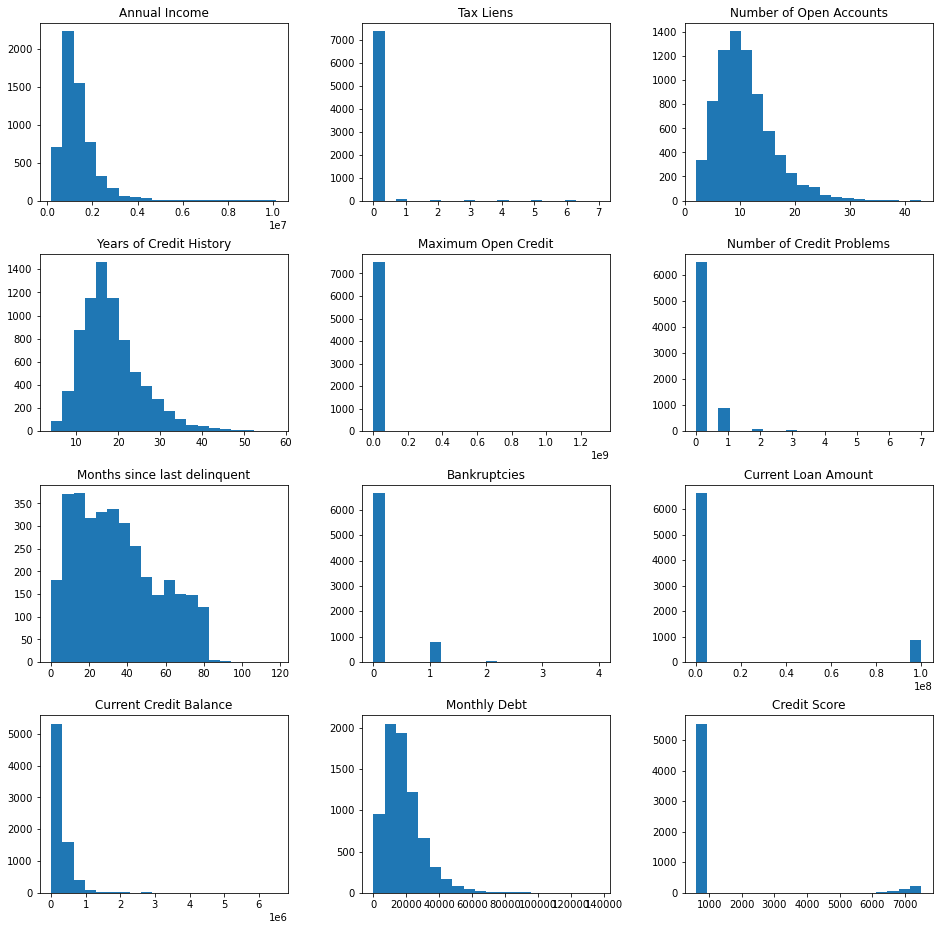

In [13]:
# гистограмма для количественных признаков
train[NUM_FEATURE_NAMES].hist(figsize=(16, 16), bins=20, grid=False);

#### 2.3 Выбросы

In [17]:
# annual_income_threshold = 4000000
# train[train['Annual Income'] > annual_income_threshold]
# credit_score_t = 1000
# train[train['Credit Score'] > credit_score_t].describe().T
# tax_liens_t = 1
# train[train['Tax Liens'] > tax_liens_t]
# +++++++++++++++
# number_of_open_accs_threshold = 30
# train[train['Number of Open Accounts'] > number_of_open_accs_threshold]
# +++++++++++++++
# years_of_credit_hist_threshold = 50
# train[train['Years of Credit History'] > years_of_credit_hist_threshold]
# +++++++++++++++
# max_open_credit_t = 100000000
# train[train['Maximum Open Credit'] > max_open_credit_t]
# max_number_of_credit_problems = 2
# train[train['Number of Credit Problems'] > max_number_of_credit_problems]
# months_sld = 100
# train[train['Months since last delinquent'] > months_sld]
# bankrupt_t = 4
# train[train['Bankruptcies'] > bankrupt_t]
# cur_loan_t = 10000000
# train[train['Current Loan Amount'] > cur_loan_t]
# cur_credit_bal_t = 5000000
# train[train['Current Credit Balance'] > cur_credit_bal_t]


Home Ownership  Annual Income Years in current job  Tax Liens  \
166   Home Mortgage      4580976.0              4 years        0.0   
369            Rent      4192065.0            10+ years        0.0   
384   Home Mortgage      4333577.0            10+ years        0.0   
422            Rent      4667616.0              3 years        0.0   
585   Home Mortgage      4772800.0              8 years        0.0   
...             ...            ...                  ...        ...   
7097           Rent      7660648.0              4 years        0.0   
7263  Home Mortgage      4378303.0            10+ years        0.0   
7299           Rent      5289676.0              3 years        0.0   
7410  Home Mortgage      4655475.0              5 years        0.0   
7486           Rent      5327372.0               1 year        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
166                      18.0                     25.5            1553530.0   
369                      12.0                     23.0             543510.0   
384                      14.0                     39.4             438966.0   
422                       4.0                      5.9             472428.0   
585                       9.0                     35.5                  0.0   
...                       ...                      ...                  ...   
7097                     14.0                     32.2            1187406.0   
7263                      9.0                     18.7             163240.0   
7299                     17.0                     15.4             437492.0   
7410                     17.0                     18.9            1193324.0   
7486                      7.0                     12.1             605638.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
166                         0.0                           NaN           0.0   
369                         0.0                          45.0           0.0   
384                         0.0                          17.0           0.0   
422                         0.0                           NaN           0.0   
585                         0.0                           NaN           0.0   
...                         ...                           ...           ...   
7097                        0.0                          31.0           0.0   
7263                        0.0                          24.0           0.0   
7299                        0.0                          14.0           0.0   
7410                        0.0                           NaN           0.0   
7486                        0.0                           NaN           0.0   

                 Purpose        Term  Current Loan Amount  \
166   debt consolidation   Long Term           99999999.0   
369                other  Short Term           99999999.0   
384   debt consolidation   Long Term             446028.0   
422          take a trip  Short Term             112596.0   
585       small business  Short Term           99999999.0   
...                  ...         ...                  ...   
7097       medical bills  Short Term             173492.0   
7263  debt consolidation  Short Term             217030.0   
7299  debt consolidation  Short Term             229680.0   
7410       business loan   Long Term             754688.0   
7486  debt consolidation  Short Term             111760.0   

      Current Credit Balance  Monthly Debt  Credit Score  
166                 633289.0       94674.0         727.0  
369                 382090.0       29659.0         702.0  
384                  78850.0       41530.0         717.0  
422                 152190.0        5018.0         740.0  
585                      0.0        2227.0         747.0  
...                      ...           ...           ...  
7097                783465.0       72138.0         687.0  
7263                 50749.0        8246.0         746.0  
72

### 3. Количественные признаки

#### 3.1 Состав

In [38]:
train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [47]:
train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [48]:
train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [49]:
train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

### 4. Проверить баланс классов

In [5]:
y.value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64